# Анализ отзывов на банки

В данных представлены отзывы на банки с сайта [banki.ru](https://www.banki.ru/)
- body - сам отзыв
- title - название отзыва
- rating - оценка по отзыву, варьируется от 1 до 5
- bank_name - название банка
- date - дата публикации отзыва

Необходимо EDA (Exploratory Data Analysis) по этим данным и сделать несколько выводов (приветствуются визуализации):
- назвать топ-15 банков по числу отзывов
- какой банк из числа топ-15 по отзывов имеет самый высокий средний рейтинг?
- сделать выводы об изменении среднего рейтинга банков по месяцам из топ-5 банков по числу отзывов
- нет ли в данных в целом каких-то странностей на ваш взгляд?
- дополнительный EDA на ваше усмотрение, возможные интересные наблюдения

Необходимо выбрать метрику и построить бинарный классификатор отзывов, добившись при этом лучшей метрики на валидационной выборке (отзывы >=3 считать положительными, <3 - отрицательными)

Будет плюсом визуализация результатов работы модели (ответ на вопрос: почему построенная модель считает этот отзыв положительным или отрицательным?)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/kaggle/input/sberbanktestjunds-1/parsed_reviews3.csv')
data.head(5)

,body,title,rating,bank_name,date
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03 12:46:11
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03 12:23:11
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03 12:12:36


### Ответим на 1-3 вопросы

#### Топ 15 банков по количеству отзывов:

In [3]:
data.groupby('bank_name').body.count().sort_values(ascending=False).head(15)

bank_name
Тинькофф Банк                              44864
Хоум Кредит Банк                            9310
Совкомбанк                                  6111
ВТБ                                         3817
СберБанк                                    3490
Альфа-Банк                                  3369
Россельхозбанк                              3064
Банк Открытие                               1894
МТС Банк                                    1542
Модульбанк                                  1460
Газпромбанк                                 1314
Московский Кредитный Банк                   1251
Азиатско-Тихоокеанский Банк                 1001
Уральский Банк Реконструкции и Развития      748
Русский Стандарт                             689
Name: body, dtype: int64

#### Банк из числа топ-15 по количеству отзывов с самым высоким средним рейтингом:

In [4]:
top15 = data.groupby('bank_name').body.count().sort_values(ascending=False).head(15).index.to_list()

In [5]:
data[data.bank_name.isin(top15)].groupby('bank_name').rating.mean().sort_values(ascending=False).index[0]

'Тинькофф Банк'

####  Выводы об изменении среднего рейтинга банков по месяцам из топ-5 банков по числу отзывов

In [6]:
top5 = data.groupby('bank_name').body.count().sort_values(ascending=False).head(5).index.to_list()

In [7]:
data.date.dtype

dtype('O')

In [8]:
data['date'] = pd.to_datetime(data.date)

In [9]:
data.date.dtype

dtype('<M8[ns]')

In [10]:
data['month'] = data.date.dt.month

In [11]:
data['ymd'] = data.date.dt.date

In [12]:
data5 = data[data.bank_name.isin(top5)]

[Text(0.5, 1.0, 'Средний рейтинг по месяцам')]

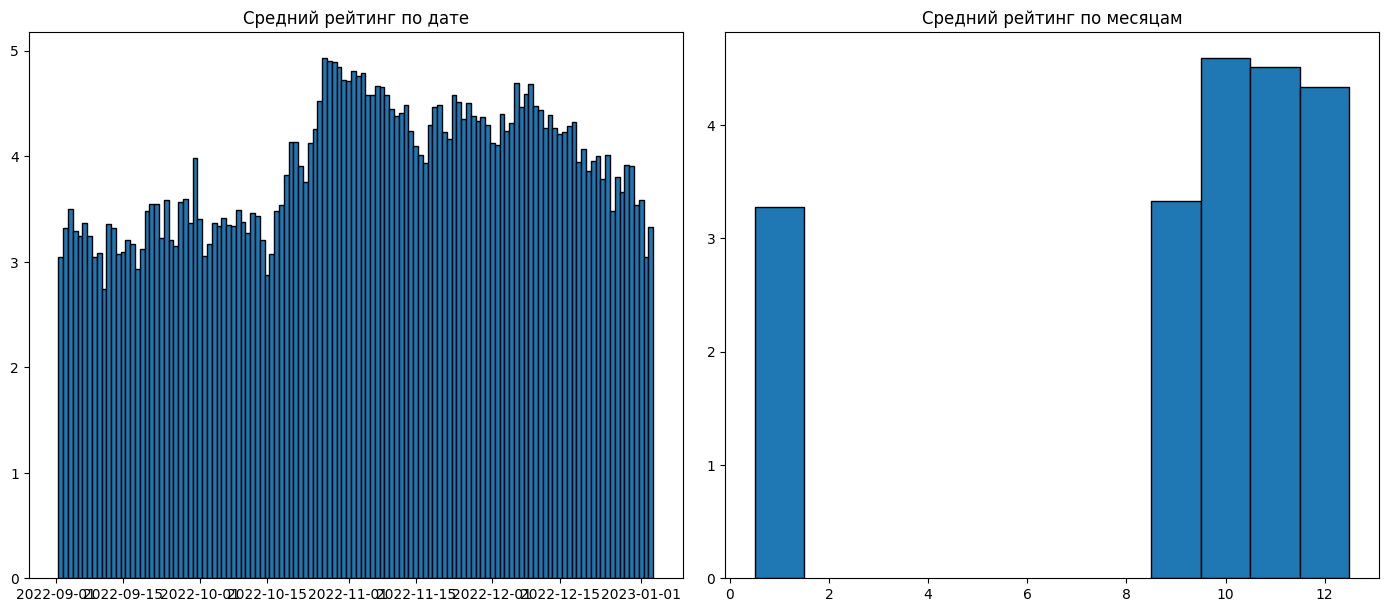

In [13]:
fig = plt.figure()

fig.set_size_inches(14, 6)

ax_1 = fig.add_subplot(1, 2, 1)
plt.bar(sorted(list(data5['ymd'].unique())), 
        data5.groupby('ymd', as_index=False)['rating'].mean()['rating'], edgecolor = 'black',
        width=1)

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(data5['month'].unique())), 
        data5.groupby('month', as_index=False)['rating'].mean()['rating'], edgecolor = 'black',
        width=1)

fig.tight_layout()

ax_1.set(title = 'Средний рейтинг по дате')
ax_2.set(title = 'Средний рейтинг по месяцам')

#### Выводы
##### К концу года рейтинг возрос, а в новом году упал до значений сентября. Возможно это связано с "Чёрной пятницей" и "Новогодними" акциями, а также с событиями в экономике и политике.

### Доп EDA

In [14]:
data.describe()

,rating,date,month
count,92735.000000,92735,92735.000000
mean,4.064086,2022-11-12 00:47:13.684552704,10.790683
min,1.000000,2022-09-02 11:28:11,1.000000
25%,4.000000,2022-10-27 15:13:11.500000,10.000000
50%,5.000000,2022-11-08 20:41:46,11.000000
75%,5.000000,2022-12-08 01:15:38,12.000000
max,5.000000,2023-01-03 12:46:11,12.000000
std,1.620702,NaN,1.152029


In [15]:
data.describe(include='O')

,body,title,bank_name,ymd
count,92735,92735,92735,92735
unique,91832,54505,157,124
top,&lt;p&gt;Что мне больше всего нравится в банке...,Благодарность,Тинькофф Банк,2022-10-27
freq,33,2051,44864,7627


##### Из 157 банков только у 13 больше 1000 отзывов (из первого вопроса)

33 повторяющихся 1 в 1 отзыва, подозрительно

In [16]:
data.nunique()

body         91832
title        54505
rating           5
bank_name      157
date         91059
month            5
ymd            124
dtype: int64

In [17]:
data.shape[0]

92735

903 отзыва не уникальны

#### Проверим пропуски

In [18]:
data.isna().sum()

body         0
title        0
rating       0
bank_name    0
date         0
month        0
ymd          0
dtype: int64

В данных нет пропусков

#### Посмотрим графики

<Axes: >

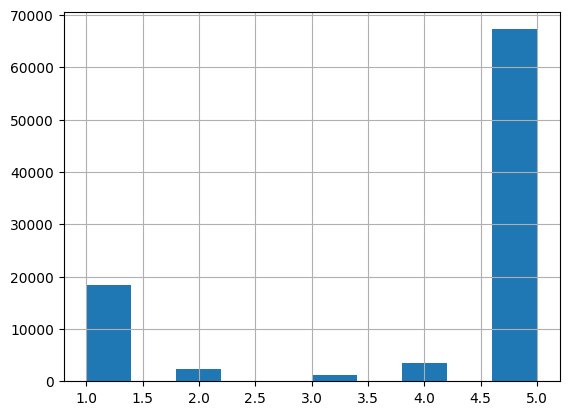

In [19]:
data.rating.hist()

In [20]:
data.rating.value_counts()

rating
5    67244
1    18433
4     3466
2     2410
3     1182
Name: count, dtype: int64

Большиство оценок 1 и 5, а 2, 3, 4 составляют меньшую долю. При сведении к бинарной классификации отзывов таргетная переменная будет всё равно не сбалансирована

Также большинство отзывов положительны

(0.0, 7000.0)

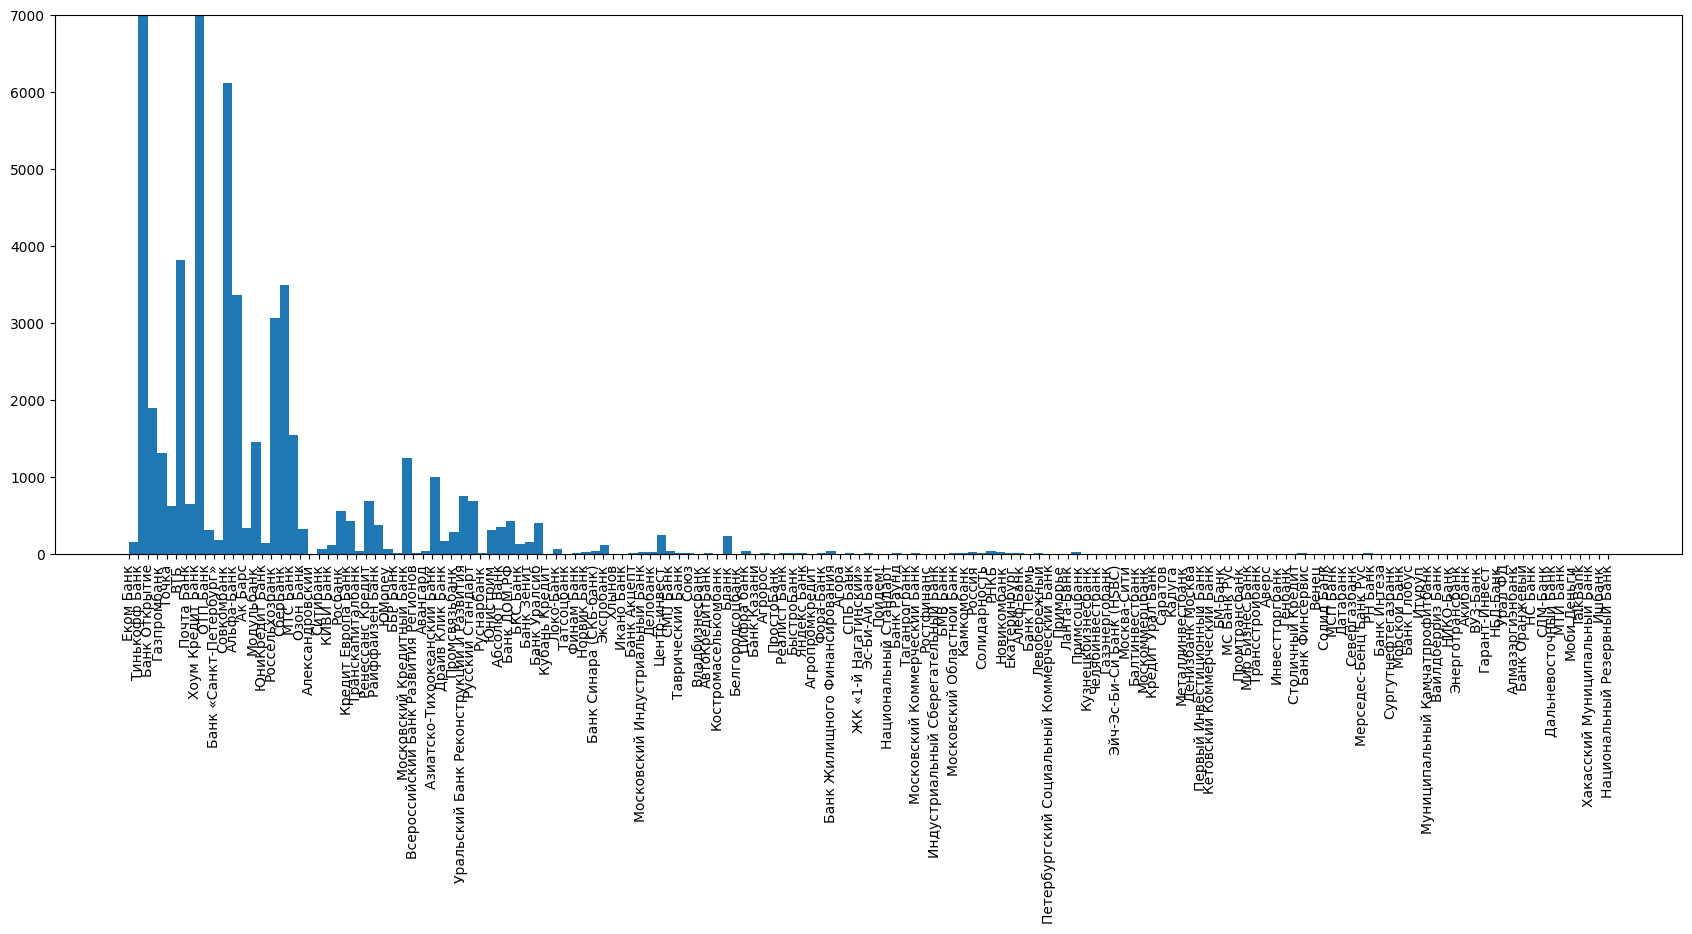

In [21]:
data.bank_name.hist(xrot=90, figsize=[21,7], grid=False, bins=157)
plt.ylim((0, 7000))
#Tinkoff = 44864
#Хоум-Кредит ~= 9500

In [22]:
data['hour'] = data.date.dt.hour

<BarContainer object of 24 artists>

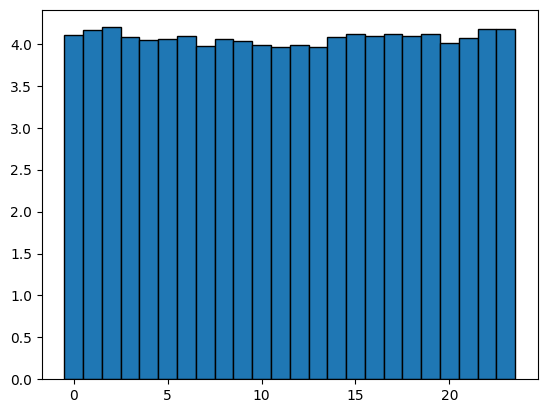

In [23]:
plt.bar(sorted(list(data['hour'].unique())), 
        data.groupby('hour', as_index=False)['rating'].mean()['rating'], edgecolor = 'black',
        width=1)

Оценка чуть ниже при написании отзыва в начале рабочего дня, а также в 8-9 вечера

In [24]:
data['day_of_week'] = data.date.dt.dayofweek

<BarContainer object of 7 artists>

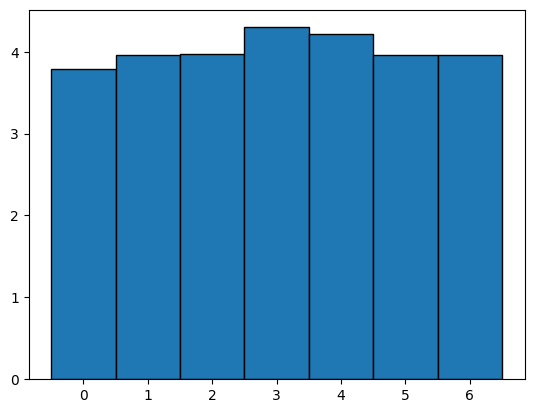

In [25]:
plt.bar(sorted(list(data['day_of_week'].unique())), 
        data.groupby('day_of_week', as_index=False)['rating'].mean()['rating'], edgecolor = 'black',
        width=1)

В понедельник ставят оценки чуть ниже, а в четверг и пятницу чуть выше

<BarContainer object of 31 artists>

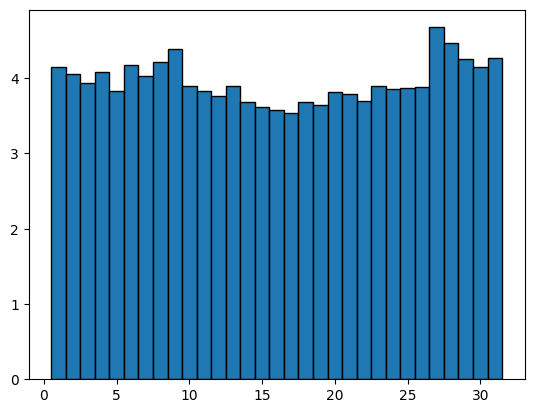

In [26]:
data['day'] = data.date.dt.day
plt.bar(sorted(list(data['day'].unique())), 
        data.groupby('day', as_index=False)['rating'].mean()['rating'], edgecolor = 'black',
        width=1)

#### В 10-х числах месяца отзывы падают

## Построение модели

In [27]:
data.head(5)

,body,title,rating,bank_name,date,month,ymd,hour,day_of_week,day
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03 12:46:11,1,2023-01-03,12,1,3
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46,1,2023-01-03,12,1,3
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03 12:23:11,1,2023-01-03,12,1,3
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07,1,2023-01-03,12,1,3
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03 12:12:36,1,2023-01-03,12,1,3


### Рассмотрим и очистим отзывы и заголовки

In [28]:
data.body[0]

'&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пишу сюда для более скорого разрешения вопроса\xa0&lt;/p&gt;\r\n&lt;p&gt;Пополнил через Юмани Озон банк&lt;/p&gt;\r\n&lt;p&gt;после чего вывести деньги не дал, сославшись на сомнительные операции(понимаю, могло так показаться)&lt;/p&gt;\r\n&lt;p&gt;просто озон удобен тем что можно пополнить его через QIWI и Юмани без комиссии, за что ценю&lt;/p&gt;\r\n&lt;p&gt;документы предоставил, причины переводов тоже&lt;/p&gt;\r\n&lt;p&gt;надеюсь на разблокировку, если не для переводов, то хотя бы для оплаты товаров&lt;/p&gt;\r\n&lt;p&gt;для привлечения внимания пока ставлю 1&lt;/p&gt;\r\n&lt;p&gt;после решения вопроса поставлю 5&lt;/p&gt;'

In [29]:
words = set()
for i in range(data.shape[0]):
    for word in data.body[i].split(' '):
        if word not in words:
            words.add(word)

In [30]:
sorted(list(words))

['',
 '\t\t\r\n7.1\tдополнительные',
 '\t+7-495-723-***',
 '\t68,50.&lt;/p&gt;\r\n&lt;p&gt;Когда',
 '\t8(800)',
 '\tРаскиным',
 '\tС',
 '\n\n@Juliya_visa',
 '\n\nДвижение',
 '\n\nНапомню,',
 '\n\nРаботать',
 '\r\n',
 '\r\n\r\n',
 '\r\n\r\n\r\n\r\nПричина',
 '\r\n\r\n\r\n&lt;img',
 '\r\n\r\n\r\nВ',
 '\r\n\r\n\r\nКогда',
 '\r\n\r\n\r\nМаксимальная',
 '\r\n\r\n\r\nЭто',
 '\r\n\r\n\r\nЯ',
 '\r\n\r\n&lt;br&gt;',
 '\r\n\r\n&lt;br&gt;В',
 '\r\n\r\n&lt;br&gt;Всем',
 '\r\n\r\n&lt;br&gt;Даже',
 '\r\n\r\n&lt;br&gt;Звонил',
 '\r\n\r\n&lt;br&gt;И',
 '\r\n\r\n&lt;br&gt;Наталья',
 '\r\n\r\n&lt;br&gt;Нашел',
 '\r\n\r\n&lt;br&gt;Но',
 '\r\n\r\n&lt;br&gt;Ну',
 '\r\n\r\n&lt;br&gt;Получаю',
 '\r\n\r\n&lt;br&gt;Также',
 '\r\n\r\n&lt;br&gt;Трубку',
 '\r\n\r\n&lt;br&gt;Удивительно,',
 '\r\n\r\n&lt;br&gt;Я',
 '\r\n\r\n&lt;br&gt;для',
 '\r\n\r\n&lt;br&gt;мне',
 '\r\n\r\n&lt;br&gt;получил',
 '\r\n\r\n&lt;p&gt;Луууууууууучшииииий',
 '\r\n\r\n&lt;p&gt;Особенно',
 '\r\n\r\n&lt;p&gt;Переводы',
 '\r\n\r\n&lt;p&gt;Я'

##### Очень много служебных символов. Уберём их.

In [31]:
def cleaning(series):
    ans = series.str.replace(r'&#039;', '', n=-1, case=None, flags=0, regex=True) 
    ans0 = ans.str.replace(r'/?[a-z]?[0-9]?[a-z]?&[a-z][0-9]?[a-z][a-z]?[a-z]?;', '', n=-1, case=None, flags=0, regex=True) 
    ans1 = ans0.str.replace(r'[\s]', ' ', n=-1, case=None, flags=0, regex=True) 
    ans2 = ans1.str.replace(r'[^+-=%$€,.\w\d\s]+', '', n=-1, case=None, flags=0, regex=True)
    return ans2

In [32]:
test = cleaning(data.body)

In [33]:
words2 = set()
for i in range(test.shape[0]):
    for word in test[i].split(' '):
        if word not in words2:
            words2.add(word)

In [34]:
sorted(list(words2))

['',
 '$',
 '$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$',
 '$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$Карты',
 '$,',
 '$.',
 '$0',
 '$1,',
 '$1.51.',
 '$10,000',
 '$100',
 '$1000',
 '$10k',
 '$10тыс.,',
 '$1100',
 '$115',
 '$115.',
 '$11609,',
 '$11844.',
 '$15.13.',
 '$150',
 '$150,',
 '$16',
 '$199,27',
 '$20',
 '$20,000',
 '$200',
 '$200,',
 '$2000',
 '$20000',
 '$2100.',
 '$25',
 '$2800',
 '$300',
 '$33',
 '$400',
 '$5',
 '$6,98.',
 '$600.',
 '$700',
 '$7000',
 '$760',
 '$83.03,',
 '$86.465,',
 '$=62,55',
 '$на',
 '$€',
 '$€.',
 '%',
 '%%',
 '%%%',
 '%%%,',
 '%%%.',
 '%%,',
 '%%.',
 '%+',
 '%+проценты',
 '%,',
 '%,а',
 '%,в',
 '%,думали',
 '%,за',
 '%,заявку',
 '%,и',
 '%,на',
 '%,начисленные',
 '%,не',
 '%,но',
 '%,одобрили',
 '%,от',
 '%,очень',
 '%,рассказала',
 '%,счет',
 '%-',
 '%-в',
 '%-ная',
 '%-ную',
 '%-ой',
 '%-оформил',
 '%-ставки,',
 '%-тную',
 '%-ты',
 '%-ты.',
 '%-ы',
 '%.',
 '%..',
 '%...',
 '%.7.',
 '%.Банк',
 '%.В',
 '%.Если',
 '%.Закрыла',
 '%.Зашла',
 '%.Крайне',
 '%.Но',
 '%.Одн

Стало лучше

Рассмотрим заголовки

In [35]:
titles = set()
for i in range(data.shape[0]):
    for word in data.title[i].split(' '):
        if word not in titles:
            titles.add(word)

In [36]:
sorted(list(titles))

['',
 '!',
 '!!',
 '!!!',
 '!!!!',
 '!!!!!',
 '!!!Лучший!!!',
 '!!!Нарушение',
 '!!)',
 '!)',
 '!?!',
 '#',
 '#1',
 '#120наВСЁ',
 '#ozon',
 '#ВСЕСРАЗУ',
 '#МожноВСЁ&quot;',
 '#МожноВсе',
 '#МожноЛиДобиться',
 '#баланса',
 '$',
 '$10',
 '$200',
 '$300,',
 '%',
 '%!',
 '%%',
 '%&quot;',
 '%&quot;:',
 '%(',
 '%)',
 '%,',
 '%.',
 '%=',
 '%»',
 '%на',
 '%ставка',
 '%ставки',
 '&#039;помог&#039;',
 '&amp;',
 '&amp;&amp;&amp;&amp;&amp;',
 '&quot;',
 '&quot;(не)Получи',
 '&quot;,',
 '&quot;...Отличный',
 '&quot;0%&quot;',
 '&quot;0&quot;',
 '&quot;0&quot;!',
 '&quot;100',
 '&quot;1000',
 '&quot;12-й',
 '&quot;120',
 '&quot;1500',
 '&quot;180',
 '&quot;2',
 '&quot;2&quot;',
 '&quot;2000',
 '&quot;365',
 '&quot;365&quot;',
 '&quot;365дней',
 '&quot;5',
 '&quot;5%',
 '&quot;5&quot;',
 '&quot;5букв&quot;',
 '&quot;900',
 '&quot;?',
 '&quot;Aurum&quot;',
 '&quot;CafeStore&quot;',
 '&quot;Cashback&quot;',
 '&quot;My',
 '&quot;Pro&quot;',
 '&quot;Raiffeisen',
 '&quot;Rick',
 '&quot;Tinkoff',
 '&quot;

In [37]:
test = cleaning(data.title)

In [38]:
titles2 = set()
for i in range(test.shape[0]):
    for word in test[i].split(' '):
        if word not in titles2:
            titles2.add(word)

In [39]:
sorted(list(titles2))

['',
 '$',
 '$10',
 '$200',
 '$300,',
 '%',
 '%%',
 '%,',
 '%.',
 '%:',
 '%=',
 '%на',
 '%ставка',
 '%ставки',
 '+',
 '+,и',
 '+1000',
 '+2000',
 '+двойное',
 '+рассрочка',
 ',',
 ',,',
 ',а',
 ',аннулировал',
 ',божественно',
 ',всегда',
 ',грамотные',
 ',доп.',
 ',доставка',
 ',доступный,понятный',
 ',за',
 ',загнал',
 ',из',
 ',как',
 ',которое',
 ',которую',
 ',которым',
 ',менеджеру',
 ',надёжная',
 ',не',
 ',никогда',
 ',обманули',
 ',обслуживание',
 ',ошибка',
 ',пишут',
 ',реально',
 ',с',
 ',что',
 '-',
 '--',
 '-----',
 '-.',
 '-1',
 '-120',
 '-1549',
 '-20000',
 '-2700руб.',
 '-5000',
 '-5000.',
 '-59',
 '-rep',
 '-Банк',
 '-Вы',
 '-Совкомбанк',
 '-Супер',
 '-Тинькофф',
 '-вся',
 '-выходной',
 '-гарант',
 '-изменивший',
 '-информация',
 '-как',
 '-качество',
 '-лучшее',
 '-лучший',
 '-никогда',
 '-ничего',
 '-обман',
 '-обмануть',
 '-один',
 '-одобрена',
 '-отличная',
 '-отличное',
 '-отличный',
 '-платежное',
 '-прелесть,',
 '-про',
 '-самая',
 '-самый',
 '-супер',
 '-так',

### Очистка данных

##### Поскольку задача состоит в построении бинарного классификатора отзывов, а само название банка будет давать силный вклад таргетную переменную, а также кол-во отзывов на большиснтво банков мало, то для более точного предсказания эту колонку лучше убрать.
##### Час и день недели и день также не сильно влияет в отличии от месяца, для упрощения модели их уберем.

In [40]:
try:
    data['positive'] = np.where(data['rating'] >= 3, 1, 0)
    data['clean_body'] = cleaning(data.body)
    data['clean_title'] = cleaning(data.title)
    data.drop(['rating', 'body', 'title', 'bank_name', 'date', 'hour', 'day', 'day_of_week', 'ymd'], axis=1, inplace=True)
    data = data[['clean_body', 'clean_title', 'month', 'positive']]
except KeyError:
    pass
except AttributeError:
    pass

In [41]:
data.head()

,clean_body,clean_title,month,positive
0,Добрый день пишу сюда для более скорого разре...,Заблокировали средства,1,0
1,"При возврате просроченной задолженности, банк ...",Возврат просроченной задолженномти,1,0
2,07.09.22 ю была оформлена кредитная карта 120 ...,"Ошибочное начисление комиссии, затягивание про...",1,0
3,Новый год начинается с приятностей Никогда не...,Клиентоориентиванность 10 из 10,1,1
4,Увидела на сайте Газпромбанка акцию с бонусом ...,Как Газпромбанк обманывает клиентов с акционны...,1,0


### Идея:
Взять предобученный трансформер (DistilBert) через него получить эмбединги body и title, кластерицовазть их через PCA и построить градиентный бустинг на PCA и месяце отзыва

In [42]:
from transformers import AutoTokenizer
from transformers import DistilBertModel  # https://huggingface.co/docs/transformers/model_doc/distilbert#transformers.DistilBertModel


def get_model(model_name):
    assert model_name in 'distilbert'

    checkpoint_names = {
        'distilbert': 'distilbert-base-cased'  # https://huggingface.co/distilbert-base-cased
    }

    model_classes = {
        'distilbert': DistilBertModel
    }

    return AutoTokenizer.from_pretrained(checkpoint_names[model_name]), model_classes[model_name].from_pretrained(checkpoint_names[model_name])

In [43]:
tokenizer, model = get_model('distilbert')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [44]:
### Сделаем датасет для отзывов

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding


class Reviews(Dataset):
    def __init__(self, texts, tokenizer):
        super().__init__()

        self.texts = tokenizer.batch_encode_plus(
            texts,
            add_special_tokens=True,
            return_token_type_ids=False,
            return_tensors='pt',
            truncation=True,
            padding=True
        )
        self.tokenizer = tokenizer

    def __getitem__(self, idx):
        return {'input_ids': self.texts['input_ids'][idx], 'attention_mask': self.texts['attention_mask'][idx]}

    def __len__(self):
        return len(self.texts['input_ids'])
    
    
dataset = Reviews(data['clean_body'].values.tolist(), tokenizer)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

loader = DataLoader(dataset, batch_size=32, collate_fn=data_collator, pin_memory=True, shuffle=False)

In [45]:
import torch
from tqdm import tqdm


@torch.inference_mode()
def get_embeddings_labels(model, loader):
    model.eval()
    
    total_embeddings = []
    
    for batch in tqdm(loader):
        batch = {key: batch[key].to(device) for key in ['attention_mask', 'input_ids']}

        embeddings = model(**batch)['last_hidden_state'][:, 0, :]

        total_embeddings.append(embeddings.cpu())

    return torch.cat(total_embeddings, dim=0)

In [46]:
torch.cuda.is_available()

True

In [47]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)
print(torch.cuda.get_device_name())

model = model.to(device)

cuda:0
Tesla T4


In [48]:
embeddings = get_embeddings_labels(model, loader).numpy()

embeddings

100%|██████████| 2898/2898 [28:05<00:00,  1.72it/s]


array([[ 0.13451439, -0.06700218, -0.13152836, ..., -0.3542549 ,
         0.34994155,  0.34538898],
       [ 0.22693762,  0.05147272, -0.17404896, ..., -0.3492036 ,
         0.3936319 ,  0.3781375 ],
       [ 0.1502906 , -0.02689195, -0.18102376, ..., -0.35550672,
         0.43068326,  0.30718726],
       ...,
       [ 0.09132586, -0.02474267, -0.15452372, ..., -0.36523956,
         0.45525137,  0.30318707],
       [ 0.14220163, -0.04195376, -0.16417958, ..., -0.3390547 ,
         0.46093252,  0.31132507],
       [ 0.09699942, -0.01332693, -0.17022163, ..., -0.39116612,
         0.49682242,  0.31758693]], dtype=float32)

#### То же самое для заголовков

In [49]:
dataset = Reviews(data['clean_title'].values.tolist(), tokenizer)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

loader = DataLoader(dataset, batch_size=32, collate_fn=data_collator, pin_memory=True, shuffle=False)

In [50]:
model = model.to(device)

In [51]:
embeddings_tit = get_embeddings_labels(model, loader).numpy()

embeddings_tit

100%|██████████| 2898/2898 [11:19<00:00,  4.27it/s]


array([[ 0.2740617 , -0.05409778, -0.11387435, ..., -0.27442864,
         0.38086   ,  0.11404768],
       [ 0.32424423, -0.06234852, -0.12092998, ..., -0.3008226 ,
         0.3917966 ,  0.19092484],
       [ 0.24352656, -0.00843799, -0.10912544, ..., -0.25948146,
         0.3482494 ,  0.21687323],
       ...,
       [ 0.25503296, -0.06829224, -0.09337822, ..., -0.356572  ,
         0.32743472,  0.19446519],
       [ 0.35387036, -0.05430307, -0.14029257, ..., -0.3239052 ,
         0.37535292,  0.09338348],
       [ 0.37868112, -0.1278542 , -0.11203641, ..., -0.29055887,
         0.40970019,  0.19352543]], dtype=float32)

##### Кластеризуем тексты

In [52]:
from sklearn.decomposition import PCA

centered = embeddings - embeddings.mean()
centered_tit = embeddings_tit - embeddings_tit.mean()

pca1 = PCA(n_components=50)
pca2 = PCA(n_components=50)
pca1_decomp = pca1.fit_transform(centered)
pca2_decomp = pca2.fit_transform(centered_tit)

In [53]:
from sklearn.cluster import KMeans

n_clusters = 15

kmeans1 = KMeans(n_clusters=n_clusters, random_state=0).fit(pca1_decomp)
kmeans2 = KMeans(n_clusters=n_clusters, random_state=0).fit(pca2_decomp)

data['TextCluster'] = kmeans1.labels_
data['TitleCluster'] = kmeans2.labels_

dists_columns = [f'DistanceToClusterBody_{i}' for i in range(n_clusters)]
dists_columns_title = [f'DistanceToClusterTitle_{i}' for i in range(n_clusters)]

dists1_df = pd.DataFrame(
    data=kmeans1.transform(pca1_decomp),
    columns=dists_columns
)

dists2_df = pd.DataFrame(
    data=kmeans2.transform(pca2_decomp),
    columns=dists_columns_title
)

dists1_df.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,DistanceToClusterBody_0,DistanceToClusterBody_1,DistanceToClusterBody_2,DistanceToClusterBody_3,DistanceToClusterBody_4,DistanceToClusterBody_5,DistanceToClusterBody_6,DistanceToClusterBody_7,DistanceToClusterBody_8,DistanceToClusterBody_9,DistanceToClusterBody_10,DistanceToClusterBody_11,DistanceToClusterBody_12,DistanceToClusterBody_13,DistanceToClusterBody_14
0,1.258678,1.675111,1.020022,1.084390,1.112554,1.182954,2.885864,0.975397,1.889814,1.593544,1.429282,1.456249,0.839708,1.223931,1.677469
1,1.289119,0.890642,1.507334,0.889545,1.437177,1.094548,2.663837,1.365477,0.994104,0.852845,1.232625,1.010460,1.265982,1.157423,0.728982
2,0.796983,1.408860,1.706770,1.039872,1.022944,1.314095,2.742248,0.998929,1.364701,1.472127,0.717322,1.120153,1.500518,0.640474,1.266859
3,0.641292,1.497105,1.479866,1.112557,0.696208,1.200842,2.866504,1.009511,1.534615,1.674675,0.650514,1.114921,1.486432,0.790617,1.511853
4,0.931740,1.045253,1.446399,0.840749,1.293006,1.020652,2.547174,1.305256,1.162475,1.148477,1.109031,0.948078,1.286334,1.084337,1.003974


##### Объеденим с основной таблицей

In [54]:
df = pd.concat((data, dists1_df), axis=1)
df = pd.concat((data, dists2_df), axis=1)

#df.drop(["clean_body", "clean_title"], axis=1, inplace=True)

df

,clean_body,clean_title,month,positive,TextCluster,TitleCluster,DistanceToClusterTitle_0,DistanceToClusterTitle_1,DistanceToClusterTitle_2,DistanceToClusterTitle_3,...,DistanceToClusterTitle_5,DistanceToClusterTitle_6,DistanceToClusterTitle_7,DistanceToClusterTitle_8,DistanceToClusterTitle_9,DistanceToClusterTitle_10,DistanceToClusterTitle_11,DistanceToClusterTitle_12,DistanceToClusterTitle_13,DistanceToClusterTitle_14
0,Добрый день пишу сюда для более скорого разре...,Заблокировали средства,1,0,12,3,1.839607,0.993941,1.918833,0.868156,...,1.378691,1.871449,1.617867,1.851001,1.436697,1.336069,1.526408,1.680804,3.838492,1.820948
1,"При возврате просроченной задолженности, банк ...",Возврат просроченной задолженномти,1,0,14,10,1.560779,1.283903,1.598640,1.577283,...,1.274512,1.774938,1.032875,1.759464,1.265097,0.917488,1.127070,1.322218,3.942207,1.701919
2,07.09.22 ю была оформлена кредитная карта 120 ...,"Ошибочное начисление комиссии, затягивание про...",1,0,13,1,1.641232,0.943023,1.957677,1.461088,...,1.409787,1.815503,0.981521,2.139678,1.610554,1.358152,1.367589,1.579229,3.960567,2.125433
3,Новый год начинается с приятностей Никогда не...,Клиентоориентиванность 10 из 10,1,1,0,6,2.076977,2.249825,2.532404,2.435473,...,2.133465,1.979882,2.108295,2.472438,2.217571,2.009589,2.095741,2.247189,3.536735,2.311620
4,Увидела на сайте Газпромбанка акцию с бонусом ...,Как Газпромбанк обманывает клиентов с акционны...,1,0,3,7,1.672083,1.479666,1.701795,1.912247,...,1.838918,2.110184,1.073814,2.345164,1.849724,1.463302,1.441827,1.577526,4.047130,2.207762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92730,"30 августа обнаружила, что баланс уменьшился. ...",Банк списал деньги и теперь рекомендует их сам...,9,0,0,7,1.798113,1.522049,1.929127,2.086043,...,1.763952,2.134357,1.052327,1.868904,1.931569,1.526692,1.604159,1.617064,4.040571,2.275918
92731,"Обратился с вопросом 6908609 по All Airlines, ...",Отличная консультация от сотрудника поддержки,9,1,14,1,1.913299,0.948970,2.223572,1.489932,...,1.485698,1.879215,1.430353,1.916301,1.875531,1.332345,1.823561,1.746509,3.846001,2.079183
92732,В августе 2021 я досрочно погасил ипотеку кред...,Снятие обременения с квартиры,9,0,0,12,1.592378,1.128862,1.882256,1.554121,...,1.303448,1.664148,1.170343,1.754224,1.585155,1.061269,1.350267,0.824917,3.736849,1.762705
92733,9.08.22 оформлен кредит на покупку автомобиля ...,Штрафные санкции,9,0,0,10,1.499317,1.386882,1.731729,1.519970,...,1.092421,1.650875,1.489356,1.678023,1.434163,0.930598,1.366069,1.319958,3.569532,1.456628


##### Сохраним таблицу с обработанными данными, чтобы не обсчитывать эмбединги заново в случае перезапуска

In [60]:
#df.to_csv('out1.csv', index=False)  

##### Очищаем память

In [70]:
try:
    model.cpu()
    
    del model
    del tokenizer
    
    del dataset
    del loader
    
    del embeddings
    del centered
    del pca
    del pca_decomp
except:
    pass

#### Построим градиентный бустинг по полученным данным

In [2]:
from catboost import CatBoostClassifier
from tqdm import tqdm


object_cols = ['TitleCluster', 'TextCluster', 'month']

catboost = CatBoostClassifier(
    iterations=200,
    learning_rate=1,
    depth=2,
    random_seed=1,
    thread_count=-1,
    task_type="GPU"
)

##### Загрузим данные, в случае если работа прерывалась

In [3]:
df = pd.read_csv('out1.csv')

##### Уберём из таблицы лишнее

In [4]:
try:
    df.drop(['clean_body', 'clean_title'], axis=1, inplace=True)
except KeyError:
    pass

In [5]:
df

,month,positive,TextCluster,TitleCluster,DistanceToClusterTitle_0,DistanceToClusterTitle_1,DistanceToClusterTitle_2,DistanceToClusterTitle_3,DistanceToClusterTitle_4,DistanceToClusterTitle_5,DistanceToClusterTitle_6,DistanceToClusterTitle_7,DistanceToClusterTitle_8,DistanceToClusterTitle_9,DistanceToClusterTitle_10,DistanceToClusterTitle_11,DistanceToClusterTitle_12,DistanceToClusterTitle_13,DistanceToClusterTitle_14
0,1,0,12,3,1.839607,0.993941,1.918833,0.868156,22.407938,1.378691,1.871449,1.617867,1.851001,1.436697,1.336069,1.526408,1.680804,3.838492,1.820948
1,1,0,14,10,1.560779,1.283902,1.598640,1.577283,22.141756,1.274512,1.774938,1.032875,1.759464,1.265097,0.917488,1.127070,1.322218,3.942207,1.701919
2,1,0,13,1,1.641232,0.943023,1.957677,1.461088,22.105757,1.409787,1.815503,0.981521,2.139678,1.610554,1.358152,1.367589,1.579230,3.960567,2.125433
3,1,1,0,6,2.076977,2.249824,2.532404,2.435473,22.106321,2.133465,1.979882,2.108295,2.472438,2.217572,2.009589,2.095741,2.247189,3.536735,2.311619
4,1,0,3,7,1.672083,1.479666,1.701796,1.912247,22.009232,1.838918,2.110184,1.073814,2.345164,1.849724,1.463302,1.441827,1.577526,4.047130,2.207762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92730,9,0,0,7,1.798113,1.522049,1.929127,2.086043,22.079836,1.763952,2.134357,1.052327,1.868904,1.931569,1.526692,1.604159,1.617064,4.040571,2.275918
92731,9,1,14,1,1.913299,0.948971,2.223571,1.489932,22.418888,1.485698,1.879215,1.430353,1.916302,1.875531,1.332345,1.823561,1.746509,3.846001,2.079183
92732,9,0,0,12,1.592378,1.128862,1.882256,1.554121,22.275806,1.303448,1.664148,1.170343,1.754224,1.585155,1.061269,1.350267,0.824917,3.736849,1.762705
92733,9,0,0,10,1.499317,1.386882,1.731729,1.519970,22.348791,1.092421,1.650875,1.489356,1.678023,1.434163,0.930598,1.366069,1.319958,3.569532,1.456628


##### Разделим данные на тестовую и тренировочную выборку

In [6]:
X = df.drop('positive', axis=1)
y = df.positive

In [7]:
from sklearn.metrics import fbeta_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    random_state=1, 
                                                    test_size=0.25)

##### Обучим базовую модель

In [78]:
catboost.fit(X_train, Y_train, cat_features=object_cols, eval_set=(X_test, Y_test))

0:	learn: 0.4802287	test: 0.4844070	best: 0.4844070 (0)	total: 107ms	remaining: 21.3s
1:	learn: 0.4054026	test: 0.4127065	best: 0.4127065 (1)	total: 118ms	remaining: 11.7s
2:	learn: 0.3949362	test: 0.4001182	best: 0.4001182 (2)	total: 129ms	remaining: 8.45s
3:	learn: 0.3902834	test: 0.3946082	best: 0.3946082 (3)	total: 139ms	remaining: 6.83s
4:	learn: 0.3871110	test: 0.3918995	best: 0.3918995 (4)	total: 150ms	remaining: 5.85s
5:	learn: 0.3838684	test: 0.3895971	best: 0.3895971 (5)	total: 161ms	remaining: 5.2s
6:	learn: 0.3822736	test: 0.3879718	best: 0.3879718 (6)	total: 172ms	remaining: 4.74s
7:	learn: 0.3790173	test: 0.3847151	best: 0.3847151 (7)	total: 182ms	remaining: 4.38s
8:	learn: 0.3775991	test: 0.3840162	best: 0.3840162 (8)	total: 193ms	remaining: 4.1s
9:	learn: 0.3760050	test: 0.3820734	best: 0.3820734 (9)	total: 203ms	remaining: 3.87s
10:	learn: 0.3747076	test: 0.3807466	best: 0.3807466 (10)	total: 214ms	remaining: 3.67s
11:	learn: 0.3716940	test: 0.3774750	best: 0.3774750 (

#### Вклад фичей в модель

In [79]:
for name, value in zip(catboost.feature_names_, catboost.feature_importances_, strict=True):
    print(f"Feature {name}: {value}")

Feature month: 2.690435247179779
Feature TextCluster: 21.211216912708537
Feature TitleCluster: 1.5245112098856288
Feature DistanceToClusterTitle_0: 6.051903368288608
Feature DistanceToClusterTitle_1: 1.4213529408662906
Feature DistanceToClusterTitle_2: 9.565795110274227
Feature DistanceToClusterTitle_3: 0.967362224390757
Feature DistanceToClusterTitle_4: 1.3463887697324022
Feature DistanceToClusterTitle_5: 3.64501101809999
Feature DistanceToClusterTitle_6: 3.0662724945711566
Feature DistanceToClusterTitle_7: 9.371060678271808
Feature DistanceToClusterTitle_8: 18.59538732311526
Feature DistanceToClusterTitle_9: 3.11856788848603
Feature DistanceToClusterTitle_10: 1.3722793001015383
Feature DistanceToClusterTitle_11: 4.0394711379209545
Feature DistanceToClusterTitle_12: 1.0805394996566569
Feature DistanceToClusterTitle_13: 2.288749810155635
Feature DistanceToClusterTitle_14: 8.64369506629471


#### Выберем наиболее подходящие метрики 

In [8]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay

In [82]:
y_pred = catboost.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61      5229
           1       0.87      0.93      0.90     17955

    accuracy                           0.84     23184
   macro avg       0.79      0.74      0.76     23184
weighted avg       0.84      0.84      0.84     23184



Area under curve (AUC):  0.8791427901472089


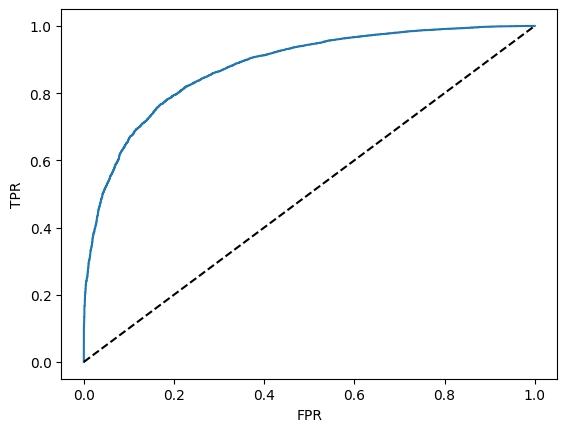

In [83]:
y_score = catboost.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_score)

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black');
print ('Area under curve (AUC): ', auc(fpr, tpr))


#На самом деле ROC-AUC не подходит из-за дисбаланса класса

Area under curve (PR-AUC):  0.9594114610478129


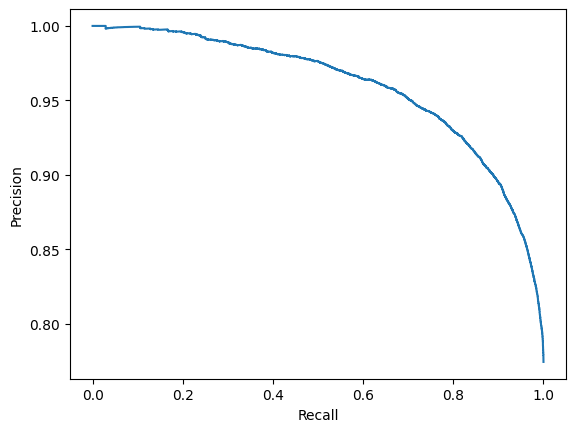

In [85]:
# Получим всевозможные пары Precision, Recall
precision, recall, thresholds = precision_recall_curve(Y_test, catboost.predict_proba(X_test)[:, 1])

# нарисуем PR-кривую
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

# Посчитаем PR-AUC
print ('Area under curve (PR-AUC): ', auc(recall, precision))

##### Из-за дисбаланса классов лучше подойдёт PR-AUC для оценки модели, также стоит учитывать f-меру

#### Сделаем GridSearch для нахождения оптимальных параметров

In [9]:
from sklearn.model_selection import GridSearchCV

##### Перевзвесим веса класса positive

In [10]:
neg = df.positive[df.positive == 0].count()
pos = df.positive[df.positive == 1].count()
class_weights = {0: df.shape[0] / neg,
                 1: df.shape[0] / pos}

class_weights

{0: 4.449215563978314, 1: 1.289920992600011}

In [14]:
catboost2 = CatBoostClassifier(
    class_weights=class_weights,
    random_seed=1,
    task_type="GPU"
)

In [15]:
catboost2.fit(X_train, Y_train, cat_features=object_cols, eval_set=(X_test, Y_test))

Learning rate set to 0.049651
0:	learn: 0.6726218	test: 0.6730091	best: 0.6730091 (0)	total: 318ms	remaining: 5m 18s
1:	learn: 0.6521776	test: 0.6528734	best: 0.6528734 (1)	total: 346ms	remaining: 2m 52s
2:	learn: 0.6356699	test: 0.6366179	best: 0.6366179 (2)	total: 374ms	remaining: 2m 4s
3:	learn: 0.6202479	test: 0.6215262	best: 0.6215262 (3)	total: 404ms	remaining: 1m 40s
4:	learn: 0.6055944	test: 0.6071775	best: 0.6071775 (4)	total: 428ms	remaining: 1m 25s
5:	learn: 0.5926208	test: 0.5945059	best: 0.5945059 (5)	total: 457ms	remaining: 1m 15s
6:	learn: 0.5808163	test: 0.5829929	best: 0.5829929 (6)	total: 489ms	remaining: 1m 9s
7:	learn: 0.5707701	test: 0.5731674	best: 0.5731674 (7)	total: 518ms	remaining: 1m 4s
8:	learn: 0.5614026	test: 0.5639530	best: 0.5639530 (8)	total: 547ms	remaining: 1m
9:	learn: 0.5539953	test: 0.5568925	best: 0.5568925 (9)	total: 575ms	remaining: 56.9s
10:	learn: 0.5469312	test: 0.5500342	best: 0.5500342 (10)	total: 602ms	remaining: 54.2s
11:	learn: 0.5404394

              precision    recall  f1-score   support

           0       0.57      0.82      0.67      5229
           1       0.94      0.82      0.88     17955

    accuracy                           0.82     23184
   macro avg       0.76      0.82      0.78     23184
weighted avg       0.86      0.82      0.83     23184

Area under curve (PR-AUC):  0.9686404746261766


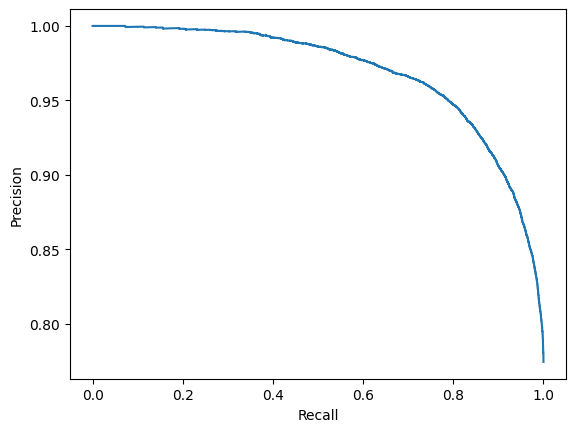

In [16]:
y_pred2 = catboost2.predict(X_test)

print(classification_report(Y_test, y_pred2))
# Получим всевозможные пары Precision, Recall
precision, recall, thresholds = precision_recall_curve(Y_test, catboost2.predict_proba(X_test)[:, 1])

# нарисуем PR-кривую
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

# Посчитаем PR-AUC
print ('Area under curve (PR-AUC): ', auc(recall, precision))

##### С учётом новых весов f-мера по 0 выросла

In [17]:
params = {
          'max_depth': [3, 5, 8],
          'l2_leaf_reg': [3, 5],
          'class_weights': [class_weights]
         }

grid = GridSearchCV(CatBoostClassifier(cat_features=object_cols), params, verbose=10, cv=3)
grid.fit(X_train, Y_train)

y_pred = grid.predict(X_test)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START class_weights={0: 4.449215563978314, 1: 1.289920992600011}, l2_leaf_reg=3, max_depth=3
0:	learn: 0.6823732	total: 39.2ms	remaining: 39.2s
1:	learn: 0.6726593	total: 78.8ms	remaining: 39.3s
2:	learn: 0.6625069	total: 114ms	remaining: 38.1s
3:	learn: 0.6527622	total: 147ms	remaining: 36.7s
4:	learn: 0.6441216	total: 179ms	remaining: 35.6s
5:	learn: 0.6358633	total: 213ms	remaining: 35.3s
6:	learn: 0.6278022	total: 250ms	remaining: 35.4s
7:	learn: 0.6202954	total: 284ms	remaining: 35.2s
8:	learn: 0.6132016	total: 312ms	remaining: 34.3s
9:	learn: 0.6067696	total: 345ms	remaining: 34.1s
10:	learn: 0.6006275	total: 380ms	remaining: 34.2s
11:	learn: 0.5945911	total: 412ms	remaining: 33.9s
12:	learn: 0.5891883	total: 448ms	remaining: 34s
13:	learn: 0.5839905	total: 496ms	remaining: 34.9s
14:	learn: 0.5792458	total: 535ms	remaining: 35.2s
15:	learn: 0.5750648	total: 569ms	remaining: 35s
16:	learn: 0.5710429	total: 6

              precision    recall  f1-score   support

           0       0.57      0.82      0.67      5229
           1       0.94      0.82      0.88     17955

    accuracy                           0.82     23184
   macro avg       0.76      0.82      0.77     23184
weighted avg       0.86      0.82      0.83     23184

Area under curve (PR-AUC):  0.9687676893000836


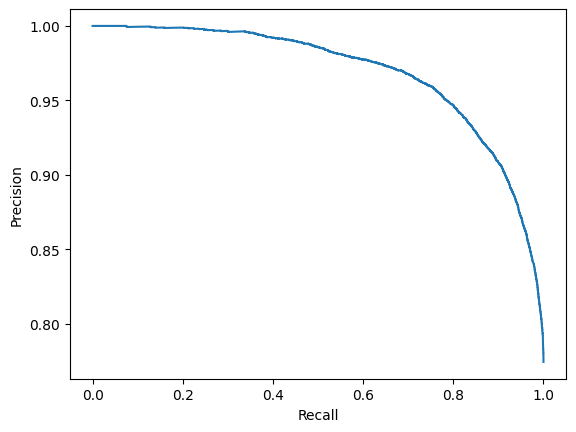

In [18]:
print(classification_report(Y_test, y_pred))
# Получим всевозможные пары Precision, Recall
precision, recall, thresholds = precision_recall_curve(Y_test, grid.predict_proba(X_test)[:, 1])

# нарисуем PR-кривую
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

# Посчитаем PR-AUC
print ('Area under curve (PR-AUC): ', auc(recall, precision))

In [20]:
grid.best_params_

{'class_weights': {0: 4.449215563978314, 1: 1.289920992600011},
 'l2_leaf_reg': 3,
 'max_depth': 8}

## Заключение

Удалось получить неплохую модель, c хорошим качеством по метрикам PR-AUC, f-мера и weighted avg acc(balanced acc)